<a href="https://colab.research.google.com/github/jinyoung0711/DL_study/blob/master/DeepLearning_with_Keras_Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.4 IMDB 데이터셋을 이용한 이진 분류 예제




In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data와 test_data는 리뷰의 목록.

각 리뷰는 단어 인덱스의 리스트.

train_labels와 test_labels는 부정을 나타내는 0과 긍정을 나타내는 1의 리스트.

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [ ]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop', 
              loss = 'binary_crossentropy', # mean_squared_error도 가능. 확률을 출력하는 모델에서는 crossentropy가 최선의 선택
              metrics = ['accuracy'])

옵티마이저의 매개변수를 바꾸는 경우

In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

자신만의 손실 함수, 측정 함수를 전달하는 경우

In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.5252 - accuracy: 0.7759 - val_loss: 0.3996 - val_accuracy: 0.8681
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3208 - accuracy: 0.9008 - val_loss: 0.3156 - val_accuracy: 0.8843
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2342 - accuracy: 0.9245 - val_loss: 0.2806 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1814 - accuracy: 0.9427 - val_loss: 0.2786 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1485 - accuracy: 0.9531 - val_loss: 0.2789 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1219 - accuracy: 0.9631 - val_loss: 0.2947 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0990 - accuracy: 0.9723 - val_loss: 0.3119 - val_accuracy: 0.8851
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

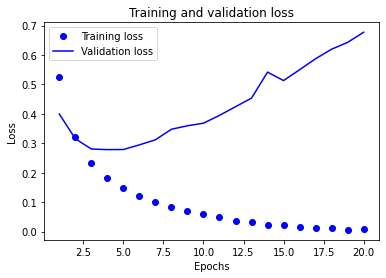

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

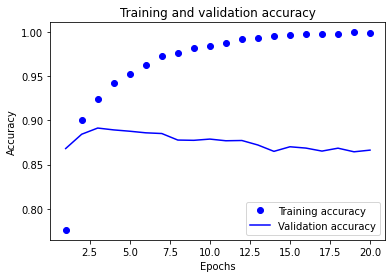

In [ ]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

과대적합 (Overfitting) 
-> 방지하기 위해 세 번째 에포크 이후 훈련 중지

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 59ms/step - loss: 0.4821 - accuracy: 0.8093
Epoch 2/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2738 - accuracy: 0.9088
Epoch 3/4
49/49 [==============================] - 2s 50ms/step - loss: 0.2088 - accuracy: 0.9273
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2899 - accuracy: 0.8860


In [ ]:
results

[0.2899336516857147, 0.8859999775886536]

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.17693314],
       [0.9999754 ],
       [0.7800426 ],
       ...,
       [0.1000893 ],
       [0.07541396],
       [0.5775172 ]], dtype=float32)

# 3.5 뉴스 기사 분류 : 다중 분류 문제




In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 0s 0us/step


코드 3-13 로이터 데이터셋을 텍스트로 디코딩

In [ ]:
word_index = reuters.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 1us/step


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

마지막 Dense 층의 크기가 46 ->  각 입력 샘플에 대해서 46차원의 벡터를 출력


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 48ms/step - loss: 2.7918 - accuracy: 0.4759 - val_loss: 1.8245 - val_accuracy: 0.6190
Epoch 2/20
16/16 [==============================] - 1s 36ms/step - loss: 1.4615 - accuracy: 0.6984 - val_loss: 1.3037 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 1s 36ms/step - loss: 1.0694 - accuracy: 0.7742 - val_loss: 1.1218 - val_accuracy: 0.7680
Epoch 4/20
16/16 [==============================] - 1s 35ms/step - loss: 0.8413 - accuracy: 0.8249 - val_loss: 1.0264 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 35ms/step - loss: 0.6725 - accuracy: 0.8583 - val_loss: 0.9611 - val_accuracy: 0.8040
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5369 - accuracy: 0.8916 - val_loss: 0.9244 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4348 - accuracy: 0.9107 - val_loss: 0.9234 - val_accuracy: 0.8060
Epoch 8/20
16

In [ ]:
import matplotlib.pyplot as plt

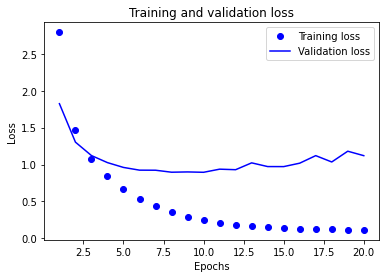

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

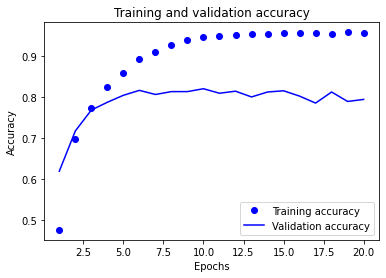

In [ ]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

9번째 epoch 이후 overfitting 시작

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 44ms/step - loss: 2.6766 - accuracy: 0.5316 - val_loss: 1.8101 - val_accuracy: 0.6400
Epoch 2/9
16/16 [==============================] - 1s 36ms/step - loss: 1.4492 - accuracy: 0.7016 - val_loss: 1.3331 - val_accuracy: 0.6950
Epoch 3/9
16/16 [==============================] - 1s 35ms/step - loss: 1.0580 - accuracy: 0.7767 - val_loss: 1.1411 - val_accuracy: 0.7650
Epoch 4/9
16/16 [==============================] - 1s 35ms/step - loss: 0.8243 - accuracy: 0.8311 - val_loss: 1.0431 - val_accuracy: 0.7920
Epoch 5/9
16/16 [==============================] - 1s 36ms/step - loss: 0.6524 - accuracy: 0.8661 - val_loss: 0.9532 - val_accuracy: 0.8050
Epoch 6/9
16/16 [==============================] - 1s 36ms/step - loss: 0.5161 - accuracy: 0.8919 - val_loss: 0.9167 - val_accuracy: 0.8170
Epoch 7/9
16/16 [==============================] - 1s 35ms/step - loss: 0.4145 - accuracy: 0.9141 - val_loss: 0.8770 - val_accuracy: 0.8190
Epoch 8/9
16/16 [===

In [ ]:
results

[0.9860614538192749, 0.790739119052887]

In [ ]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18210151380231523

새로운 데이터 예측

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 5ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

0.99999994

In [ ]:
np.argmax(predictions[0])

3

가장 큰 값으로 클래스 예측 -> 3으로 분류

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 16ms/step - loss: 3.4426 - accuracy: 0.0329 - val_loss: 2.9322 - val_accuracy: 0.0790
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 2.3670 - accuracy: 0.4070 - val_loss: 1.9238 - val_accuracy: 0.6130
Epoch 3/20
63/63 [==============================] - 1s 15ms/step - loss: 1.5465 - accuracy: 0.6505 - val_loss: 1.4674 - val_accuracy: 0.6820
Epoch 4/20
63/63 [==============================] - 1s 14ms/step - loss: 1.2561 - accuracy: 0.7142 - val_loss: 1.3809 - val_accuracy: 0.6890
Epoch 5/20
63/63 [==============================] - 1s 14ms/step - loss: 1.1466 - accuracy: 0.7250 - val_loss: 1.3699 - val_accuracy: 0.6850
Epoch 6/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0729 - accuracy: 0.7340 - val_loss: 1.3746 - val_accuracy: 0.6860
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 1.0158 - accuracy: 0.7433 - val_loss: 1.3578 - val_accuracy: 0.6870
Epoch 8/20
63

마지막 출력이 46이기 때문에 중간층의 히든 유닛이 46보다 적으면 안된다. 

더 작은 중간층을 두면 많은 정보를 중간층의 저차원 표현 공간으로 압축하려고 했기 떄문에 정보의 손실 발생


# 3.6 주택 가격 예측 : 회귀 문제